# Use case - Customer Churn Prediction and Analysis

In [1]:
#Loding and importing all the required packages
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.plotly as py
import plotly.graph_objs as go
import seaborn as sns
import sklearn.svm
import sklearn.tree
import sklearn.ensemble
import sklearn.neighbors
import sklearn.linear_model
import sklearn.metrics
import sklearn.preprocessing
from scipy import stats
from sklearn import preprocessing as prep
from sklearn.preprocessing import Imputer
import pylab as pl
plt.style.use('ggplot')
%matplotlib notebook
%matplotlib inline
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.cluster import KMeans # KMeans clustering 
from scipy.spatial.distance import cdist
from sklearn import cluster
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

C:\Users\deepanshu.chopra\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning:

numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.



### Loading dataset

In [2]:
file = 'BankCustomerChurnDataFeb19_Heavy.xlsx'

In [3]:
df = pd.read_excel(file, sheetname="BankCustomerData") 

In [4]:
# Load data
df.head(3)

,@ID,ACCOUNT.NUMBER,CUSTOMER.CODE,CUSTOMER.NO,GENDER,AGE,DAYS.AS.CUSTOMER,SECTOR,COUNTRY,CURRENCY,...,Min Bank transfer amount,Max Bank transfer amount,Min No. of Check payments,Max No. of Check payments,Min Check payment amount,Max Check payment amount,Min End balance,Max End Balance,ReasonWhyCustomerLeft,Exited
0,1,10000,15000000,100000,Male,49,784,Financial Advisors & Brokers,France,EUR,...,7860,98270,8,13,3812,87054,1563,64159,Not Exited,0
1,2,10001,15000001,100001,Male,55,288,Individual,United States of America,USD,...,8882,10115,7,12,4039,89501,5943,11346,Not Exited,0
2,3,10002,15000002,100002,Male,67,1223,Retail Small/Med Enterprise,Canada,CAD,...,4255,21758,8,10,5401,80590,8689,2520,Bad Service,1


### Exploratory Data Analysis

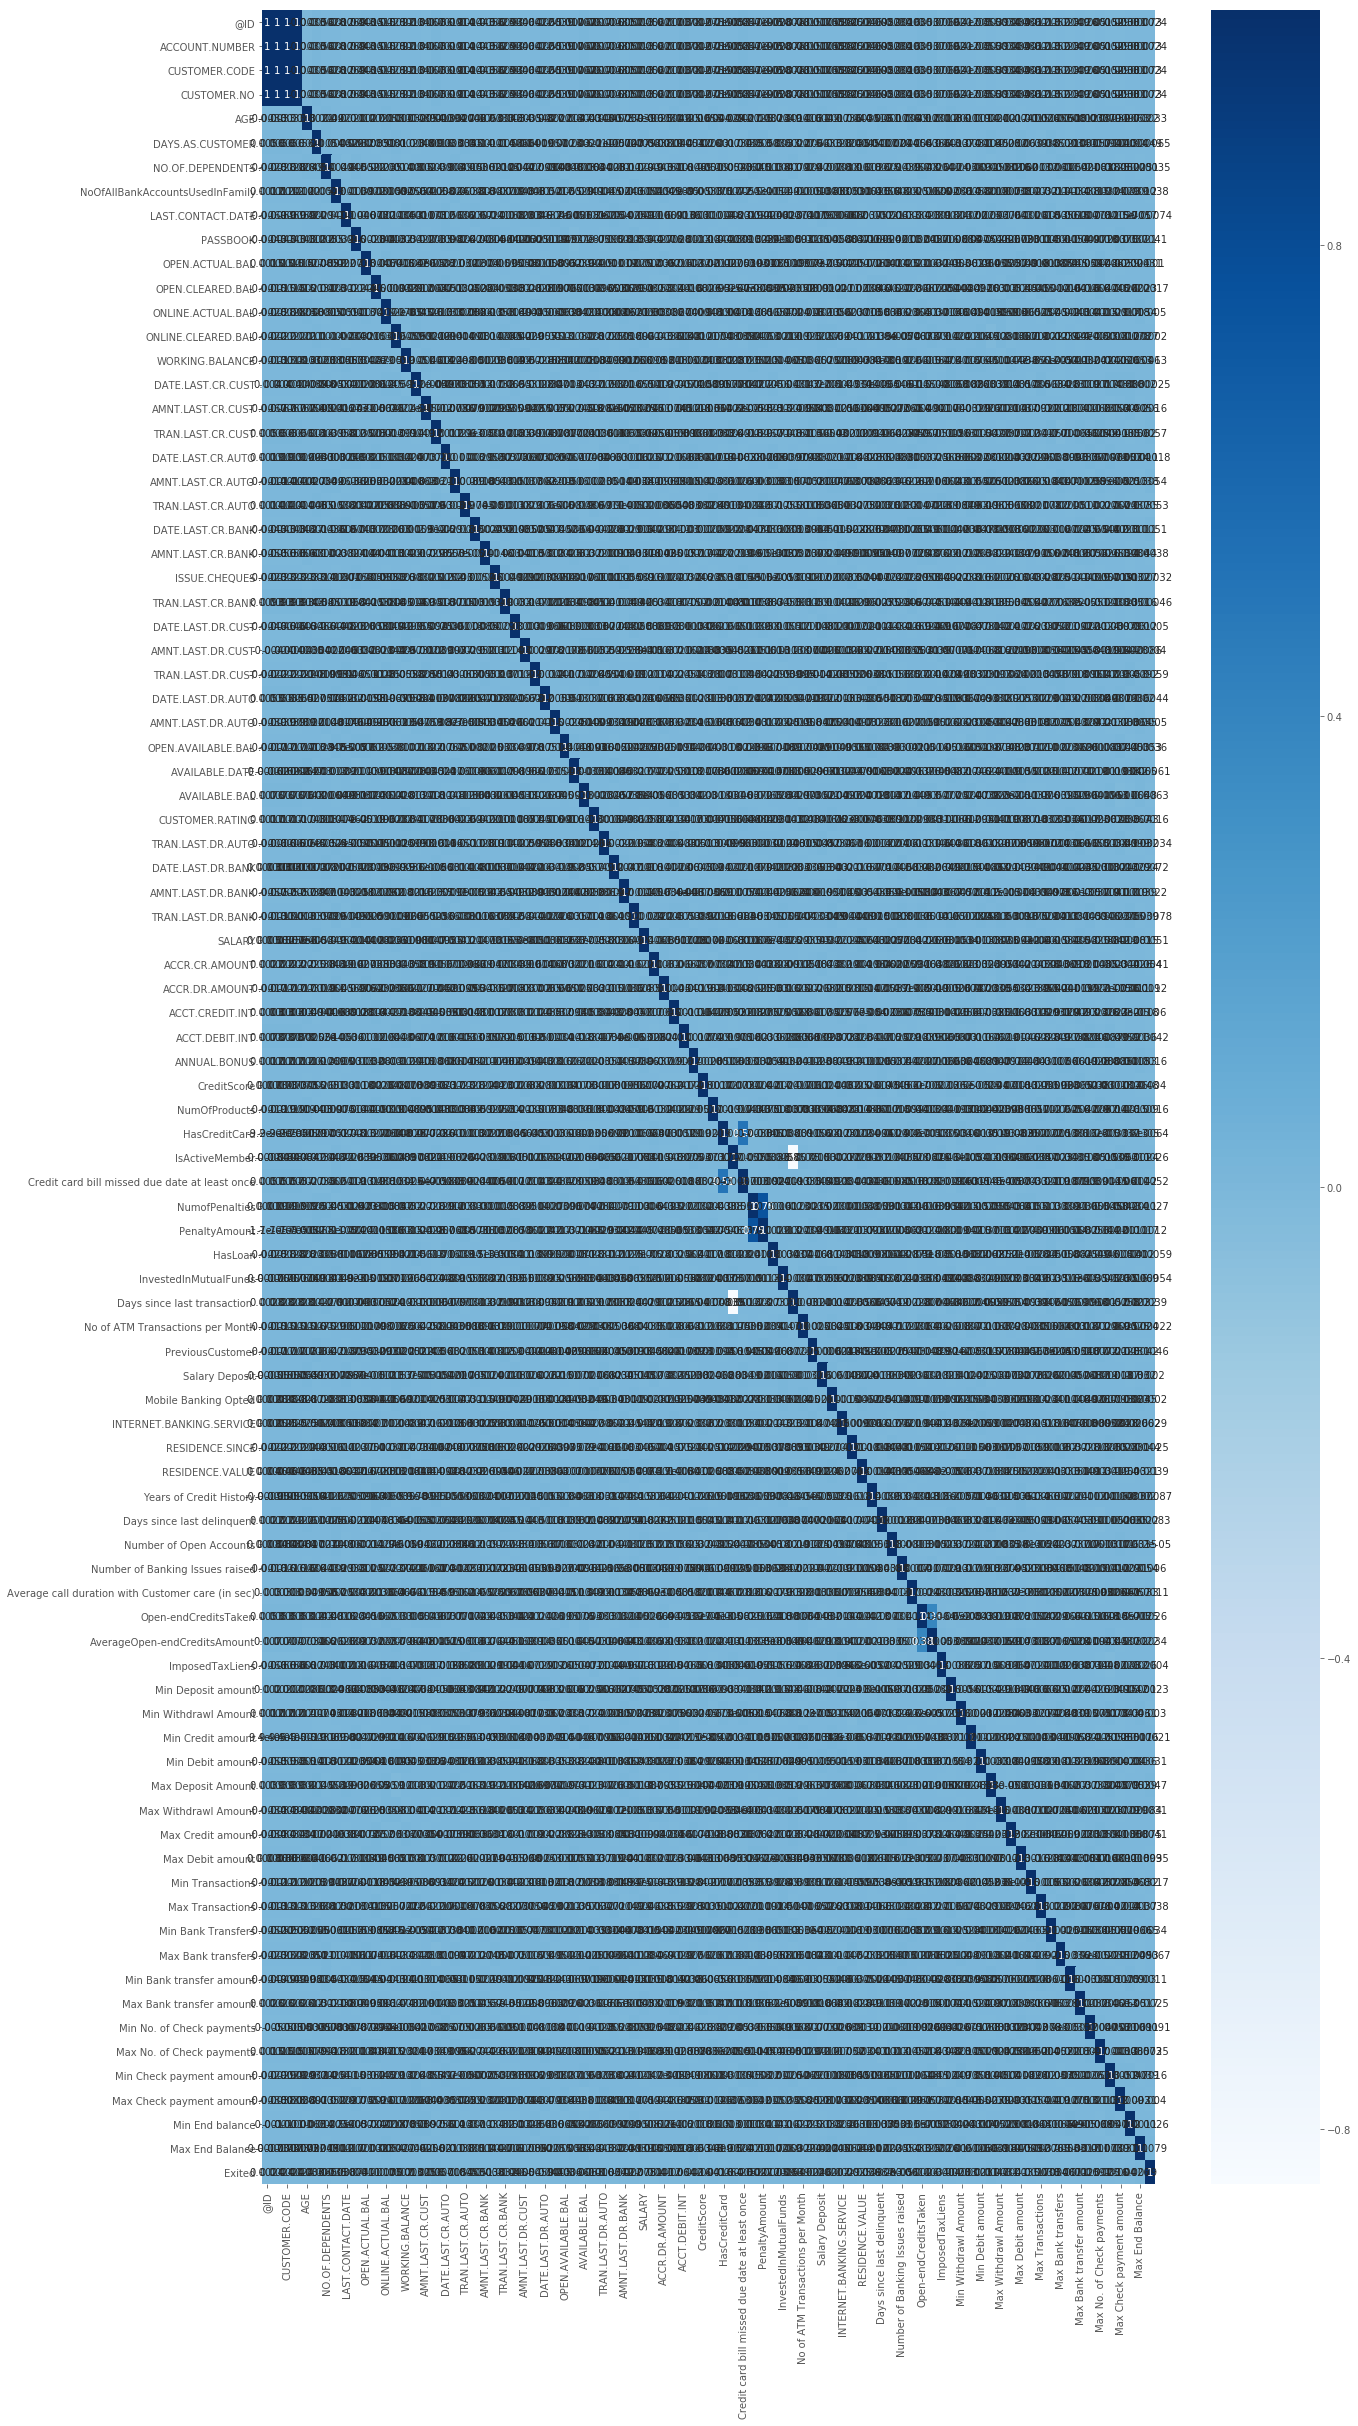

,@ID,ACCOUNT.NUMBER,CUSTOMER.CODE,CUSTOMER.NO,AGE,DAYS.AS.CUSTOMER,NO.OF.DEPENDENTS,NoOfAllBankAccountsUsedInFamily,LAST.CONTACT.DATE,PASSBOOK,...,Max Bank transfers,Min Bank transfer amount,Max Bank transfer amount,Min No. of Check payments,Max No. of Check payments,Min Check payment amount,Max Check payment amount,Min End balance,Max End Balance,Exited
@ID,1.000000,1.000000,1.000000,1.000000,-0.003313,0.005572,-0.002795,0.001182,-0.006945,-0.004287,...,-0.002293,-0.004910,0.002610,-0.004993,0.001506,-0.002850,-0.003843,-0.001037,-0.000725,0.002386
ACCOUNT.NUMBER,1.000000,1.000000,1.000000,1.000000,-0.003313,0.005572,-0.002795,0.001182,-0.006945,-0.004287,...,-0.002293,-0.004910,0.002610,-0.004993,0.001506,-0.002850,-0.003843,-0.001037,-0.000725,0.002386
CUSTOMER.CODE,1.000000,1.000000,1.000000,1.000000,-0.003313,0.005572,-0.002795,0.001182,-0.006945,-0.004287,...,-0.002293,-0.004910,0.002610,-0.004993,0.001506,-0.002850,-0.003843,-0.001037,-0.000725,0.002386
CUSTOMER.NO,1.000000,1.000000,1.000000,1.000000,-0.003313,0.005572,-0.002795,0.001182,-0.006945,-0.004287,...,-0.002293,-0.004910,0.002610,-0.004993,0.001506,-0.002850,-0.003843,-0.001037,-0.000725,0.002386
AGE,-0.003313,-0.003313,-0.003313,-0.003313,1.000000,0.002128,0.004867,0.002021,-0.002096,-0.001234,...,0.000510,-0.008042,0.001225,-0.003326,0.000791,0.000321,0.000971,-0.006340,-0.002171,0.003291
DAYS.AS.CUSTOMER,0.005572,0.005572,0.005572,0.005572,0.002128,1.000000,0.005368,-0.000521,0.002894,0.003203,...,-0.002060,-0.003436,0.003130,0.000572,0.000936,-0.001376,0.001297,0.001353,-0.000492,0.000648
NO.OF.DEPENDENTS,-0.002795,-0.002795,-0.002795,-0.002795,0.004867,0.005368,1.000000,0.004930,-0.004087,0.005467,...,0.010528,0.005375,-0.002072,-0.000827,-0.001795,-0.002455,-0.005242,-0.000246,-0.003066,0.000353
NoOfAllBankAccountsUsedInFamily,0.001182,0.001182,0.001182,0.001182,0.002021,-0.000521,0.004930,1.000000,-0.001107,0.003909,...,-0.004098,-0.003393,-0.003837,-0.001517,-0.003203,0.004017,-0.002889,0.003946,0.001213,-0.003785
LAST.CONTACT.DATE,-0.006945,-0.006945,-0.006945,-0.006945,-0.002096,0.002894,-0.004087,-0.001107,1.000000,-0.004605,...,-0.005557,-0.001486,-0.000699,0.000781,-0.001086,-0.001484,0.002663,-0.000025,0.001673,-0.000739
PASSBOOK,-0.004287,-0.004287,-0.004287,-0.004287,-0.001234,0.003203,0.005467,0.003909,-0.004605,1.000000,...,0.001067,-0.005447,-0.004861,-0.000721,0.001806,-0.003048,0.007504,0.003679,0.002142,0.004069


In [5]:
plt.subplots(figsize=(20,40))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.savefig("CorrelationMatrix.png")
plt.show()
df.corr()


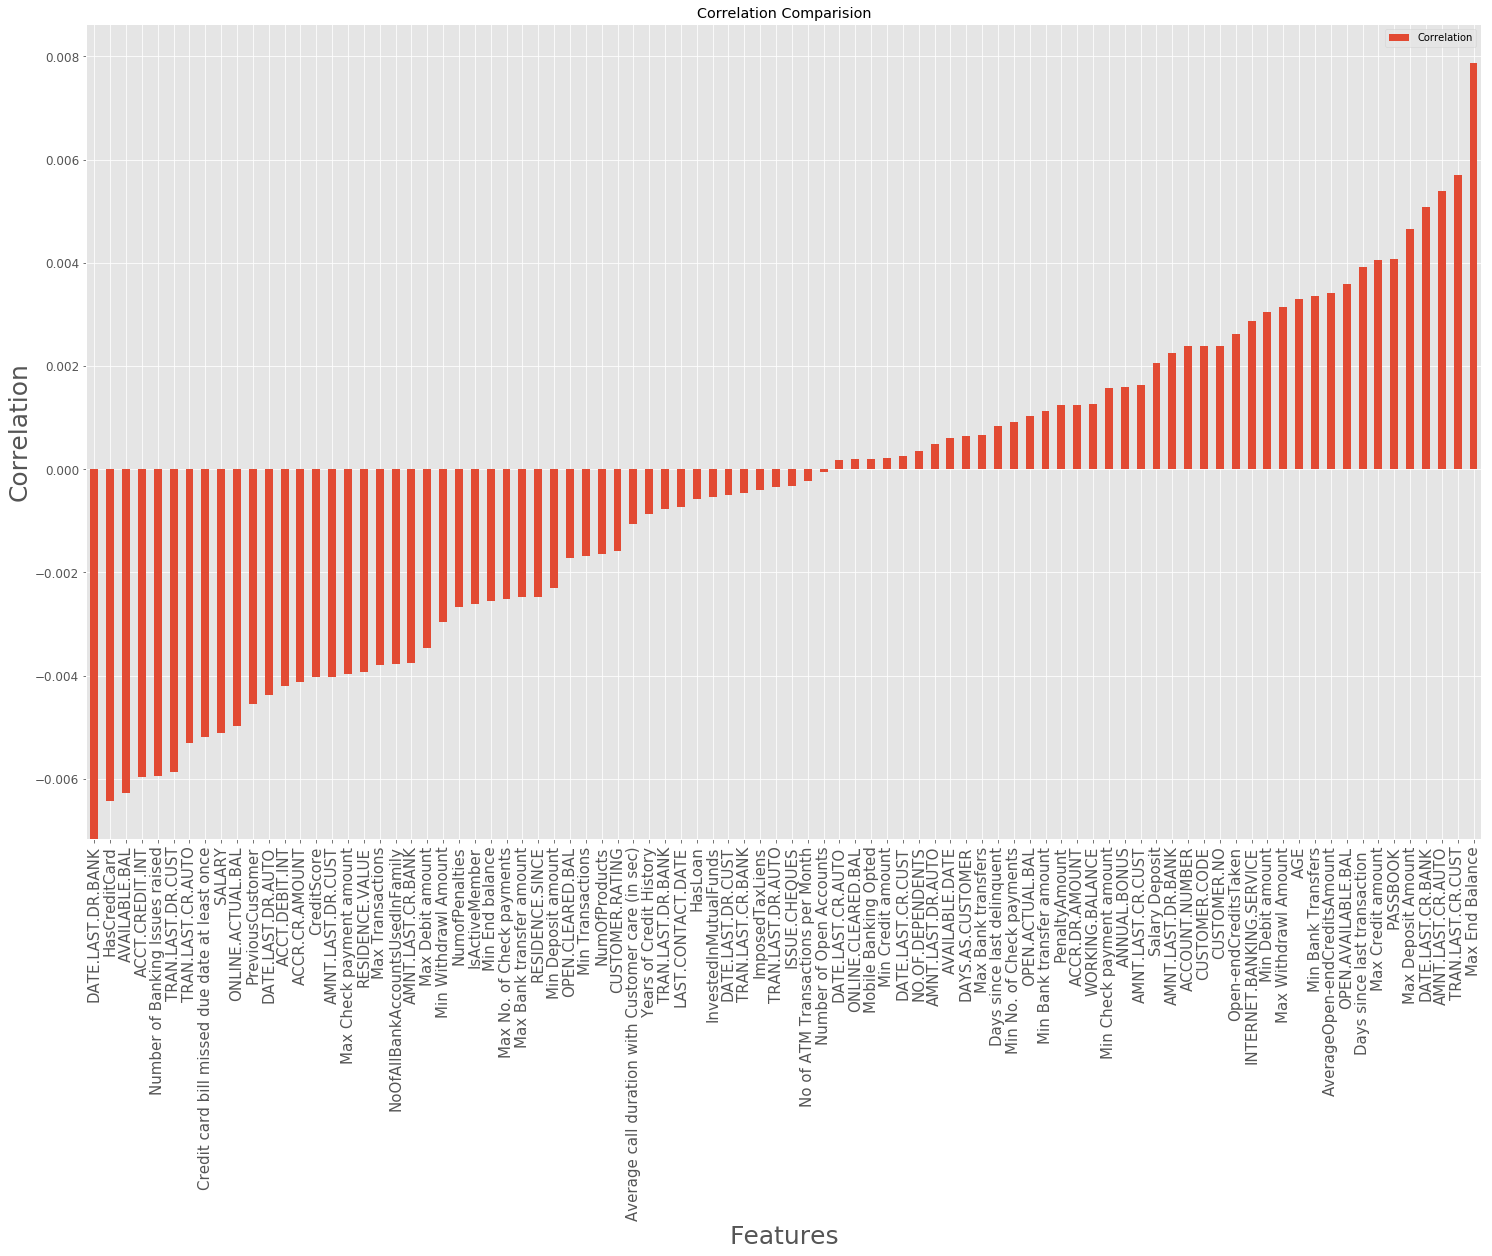

In [6]:
Correlationdf=df[df.columns[1:]].corr()['Exited'][:-1]
#Correlationdf=Correlationdf.frame(row=rownames(Correlationdf)[row(Correlationdf)], col=colnames(Correlationdf)[col(Correlationdf)], corr=c(Correlationdf))
Correlationdf=pd.DataFrame({'Features':Correlationdf.index, 'Correlation':Correlationdf.values})
Correlationdf=Correlationdf.sort_values(by='Correlation')
#print(Correlationdf)

Correlationdf = Correlationdf[Correlationdf.Features != 'Exited']
correlationvalues = Correlationdf.Correlation
my_colors = 'rgbkymc'
ax = Correlationdf.plot(kind='bar', title ="Correlation Comparision", figsize=(25, 15), legend=True, fontsize=12)
ax.set_xlabel("Features", fontsize=25)
ax.set_ylabel("Correlation", fontsize=25)
ax.set_xticklabels(Correlationdf.Features,fontsize=15)
plt.savefig("CorrelationOfFeaturesWithOutput.png")
fig =plt.show()


In [5]:
y_True = df["Exited"][df["Exited"] == 1]
print ("Churn Percentage = "+str( (y_True.shape[0] / df["Exited"].shape[0]) * 100 ), '%')

Churn Percentage = 29.801333333333336 %


In [6]:
df.drop(["ACCOUNT.NUMBER","CUSTOMER.CODE","CUSTOMER.NO"], axis = 1, inplace=True)
df.describe()

,@ID,AGE,DAYS.AS.CUSTOMER,NO.OF.DEPENDENTS,NoOfAllBankAccountsUsedInFamily,LAST.CONTACT.DATE,PASSBOOK,OPEN.ACTUAL.BAL,OPEN.CLEARED.BAL,ONLINE.ACTUAL.BAL,...,Max Bank transfers,Min Bank transfer amount,Max Bank transfer amount,Min No. of Check payments,Max No. of Check payments,Min Check payment amount,Max Check payment amount,Min End balance,Max End Balance,Exited
count,75000.000000,75000.000000,75000.000000,75000.000000,75000.00000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,...,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000
mean,37500.500000,56.482267,750.949293,4.507640,3.00024,43238.019973,0.499227,20003.447635,50495.873440,5045.764213,...,50.446933,5042.265813,50375.152680,6.199400,12.501480,5055.711147,50532.363147,5045.243387,50738.816547,0.298013
std,21650.779432,22.535485,432.304646,2.292373,1.41210,234.269225,0.500003,5790.215121,28546.497712,2862.665191,...,11.524654,2850.686350,28532.069114,1.995592,1.706852,2863.061853,28568.130639,2861.726292,28551.348489,0.457388
min,1.000000,18.000000,0.000000,1.000000,1.00000,42005.000000,0.000000,10000.826410,1000.000000,100.000000,...,31.000000,100.000000,1000.000000,1.000000,10.000000,100.000000,1002.000000,100.000000,1001.000000,0.000000
25%,18750.750000,37.000000,378.000000,2.000000,2.00000,43163.000000,0.000000,14980.715804,25805.000000,2552.000000,...,40.000000,2582.000000,25640.000000,5.000000,11.000000,2566.000000,25981.000000,2568.750000,26054.000000,0.000000
50%,37500.500000,56.000000,751.000000,5.000000,3.00000,43276.000000,0.000000,20014.215816,50327.000000,5067.000000,...,50.000000,5044.000000,50347.000000,7.000000,13.000000,5062.500000,50481.500000,5058.000000,50823.000000,0.000000
75%,56250.250000,76.000000,1124.000000,7.000000,4.00000,43391.000000,1.000000,25018.447141,75215.750000,7515.000000,...,60.000000,7509.000000,75060.500000,8.000000,14.000000,7526.250000,75220.250000,7534.000000,75467.500000,1.000000
max,75000.000000,95.000000,1500.000000,8.000000,5.00000,43504.000000,1.000000,29999.799858,99999.000000,9999.000000,...,70.000000,9999.000000,99996.000000,10.000000,15.000000,9999.000000,99999.000000,9999.000000,99999.000000,1.000000


In [7]:
test_ids = df['@ID']

### Handling the Categorical attributes by Encoding to Numerical values for analysis

In [8]:
# Discreet value integer encoder
label_encoder = preprocessing.LabelEncoder()

In [9]:
object_cols = df.select_dtypes(include=['object']).copy()

for col in object_cols:  # Iterate over chosen columns
    df[col] = label_encoder.fit_transform(df[col]) 

In [10]:
y = df['Exited'].as_matrix().astype(np.int)
y.size

75000

In [11]:
# Remove the Dependent Variable from the dataframe and put it into Independent Variable X
df.drop(["Exited","ReasonWhyCustomerLeft"], axis = 1, inplace=True)
X = df.as_matrix().astype(np.float)

### Standardaizing the data

In [12]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

### Demension Reduction Using Principle Componenent analysis - TBD - Check for the Dimensions after doing Random Forest Method 

In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.cluster import KMeans # KMeans clustering 
import matplotlib.pyplot as plt # Python defacto plotting library
import seaborn as sns # More snazzy plotting library
%matplotlib inline 
df_pca = X
pca = PCA(n_components=50)
x_new = pca.fit_transform(df_pca)

In [14]:
x_new.shape # Shape after PCA done.

(75000, 50)

### Optimal Number of Clusters using Elbow method - Euclidean Distance 

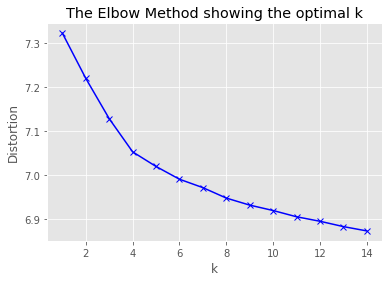

In [17]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
# k means determine k
distortions = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(x_new)
    kmeanModel.fit(x_new)
    distortions.append(sum(np.min(cdist(x_new, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / x_new.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Optimal Number of Clusters using Elbow method - Cosine Distance 

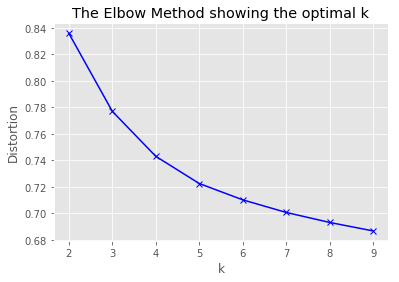

In [18]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
# k means determine k
distortions = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(x_new)
    kmeanModel.fit(x_new)
    distortions.append(sum(np.min(cdist(x_new, kmeanModel.cluster_centers_, 'cosine'), axis=1)) / x_new.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Applying K meansClustering and Plotting

In [ ]:
obs = x_new
silhouette_score_values=list()

NumberOfClusters=range(2,15)

for i in NumberOfClusters:
    
    classifier=cluster.KMeans(i,init='k-means++', n_init=10, max_iter=2, tol=0.0001, verbose=0, random_state=None, copy_x=True)
    classifier.fit(obs)
    labels= classifier.predict(obs)
    print ("Number Of Clusters:", i, "Silhouette score value", sklearn.metrics.silhouette_score(obs,labels ,metric='euclidean', sample_size=None, random_state=None))
    silhouette_score_values.append(sklearn.metrics.silhouette_score(obs,labels ,metric='euclidean', sample_size=None, random_state=None))

plt.plot(NumberOfClusters, silhouette_score_values)
plt.title("Silhouette score values vs Numbers of Clusters ")
plt.show()

Optimal_NumberOf_Components=NumberOfClusters[silhouette_score_values.index(max(silhouette_score_values))]
print ("Optimal number of components is:")
print (Optimal_NumberOf_Components)


In [ ]:
from plotly import tools
from sklearn.metrics import silhouette_samples, silhouette_score

figures = []
range_n_clusters=range(2,15)
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig = tools.make_subplots(rows=1, cols=2,
                              print_grid=False,
                              subplot_titles=('The silhouette plot for the various clusters.',
                                              'The visualization of the clustered data.'))

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    fig['layout']['xaxis1'].update(title='The silhouette coefficient values',
                                   range=[-0.1, 1])
   
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    fig['layout']['yaxis1'].update(title='Cluster label',
                                   showticklabels=False,
                                   range=[0, len(x_new) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x_new)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x_new, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x_ew, cluster_labels)
    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
        
        filled_area = go.Scatter(y=np.arange(y_lower, y_upper),
                                 x=ith_cluster_silhouette_values,
                                 mode='lines',
                                 showlegend=False,
                                 line=dict(width=0.5,
                                          color=colors),
                                 fill='tozerox')
        fig.append_trace(filled_area, 1, 1)
        
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
        

    # The vertical line for average silhouette score of all the values
    axis_line = go.Scatter(x=[silhouette_avg],
                           y=[0, len(X) + (n_clusters + 1) * 10],
                           showlegend=False,
                           mode='lines',
                           line=dict(color="red", dash='dash',
                                     width =1) )

    fig.append_trace(axis_line, 1, 1)
    
    # 2nd Plot showing the actual clusters formed
    colors = matplotlib.colors.colorConverter.to_rgb(cm.spectral(float(i) / n_clusters))
    colors = 'rgb'+str(colors)
    clusters = go.Scatter(x=X[:, 0], 
                          y=X[:, 1], 
                          showlegend=False,
                          mode='markers',
                          marker=dict(color=colors,
                                     size=4)
                         )
    fig.append_trace(clusters, 1, 2)
    
    # Labeling the clusters
    centers_ = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    centers = go.Scatter(x=centers_[:, 0], 
                         y=centers_[:, 1],
                         showlegend=False,
                         mode='markers',
                         marker=dict(color='green', size=10,
                                     line=dict(color='black',
                                                             width=1))
                        )

    fig.append_trace(centers, 1, 2)
    
    fig['layout']['xaxis2'].update(title='Feature space for the 1st feature',
                                   zeroline=False)
    fig['layout']['yaxis2'].update(title='Feature space for the 2nd feature',
                                  zeroline=False)
                              

    fig['layout'].update(title="Silhouette analysis for KMeans clustering on sample data "
                         "with n_clusters = %d" % n_clusters)
    
    figures.append(fig)

In [ ]:
# Set a 20 KMeans clustering selecting optimal k value as 20
kmeans = KMeans(n_clusters=Optimal_NumberOf_Components)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_new)
labels=np.array([kmeans.labels_])
# Define our own color map
#LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}
#label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
#plt.scatter(x_new[:,0],x_new[:,2], c= labels, alpha=0.5) 
plt.scatter(x_new[:,0], x_new[:,1], s=10, linewidths=3, c=labels)
plt.show()

In [ ]:
df = pd.DataFrame(x_new)
df['X_cluster'] = X_clustered

In [ ]:
sns.pairplot(df, hue='X_cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

### Further deep Cluster analysis can be proceeded based on our requirements

### Feature Selection Using Random Forest (Without Cross Validation)

In [ ]:

from sklearn.ensemble import RandomForestRegressor
import numpy as np

rf = RandomForestRegressor()
rf.fit(X, y)

sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), df), 
             reverse=True, key=lambda x: x[0])
scoresdf=pd.DataFrame(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), df), 
             reverse=True, key=lambda x: x[0])) 
scoresdf.columns= ["Scores of Importance", "Features"]
print(scoresdf)
my_colors = 'rgbkymc'
feat_importances = pd.Series(rf.feature_importances_, index=df.columns)
feat_importances.nlargest(80).plot(kind='bar',color=my_colors, figsize=(20,20))
fig = feat_importances.nlargest(80).plot(kind='bar',color=my_colors, figsize=(20,20)).get_figure()
fig.savefig("Top_80_Feature_Importance_RandomForestWithoutCrossValidation.png")


In [ ]:
fig = feat_importances.nlargest(20).plot(kind='bar',color=my_colors, figsize=(20,20)).get_figure()
fig.savefig("Top_20_Feature_Importance_RandomForestWithoutCrossValidation.png")


### Feature Selection Using Random Forest (Cross Validation)

In [ ]:
names = df.columns
 
rf = RandomForestRegressor(n_estimators=20, max_depth=10)
rf.fit(X, y)
scores = []
for i in range(X.shape[1]):
    score = cross_val_score(rf, X[:, i:i+1], y, scoring="r2", cv=ShuffleSplit(n_splits=2, train_size=None, test_size=.25,random_state=0))
    scores.append((round(abs(np.mean(score)), 5), names[i]))

scoresdf=pd.DataFrame(sorted(scores,reverse=True, key=lambda x: x[0])) 
scoresdf.columns= ["Scores of Importance", "Features"]
print(scoresdf)

my_colors = 'rgbkymc'
feat_importances = pd.Series(rf.feature_importances_, index=df.columns)
feat_importances.nlargest(80).plot(kind='bar',color=my_colors, figsize=(20,20))
fig = feat_importances.nlargest(80).plot(kind='bar',color=my_colors, figsize=(20,20)).get_figure()
fig.savefig("6.Feature_Importance_RandomForestWithCrossValidation.png")


### Feature Selection using Gradient Boosting Classifier

In [ ]:
gbc = ensemble.GradientBoostingClassifier()
gbc.fit(X, y)
# Get Feature Importance from the classifier
feature_importance = gbc.feature_importances_
my_colors = 'rgbkymc'
feat_importances = pd.Series(gbc.feature_importances_, index=df.columns)
feat_importances.nlargest(80).plot(kind='bar' , color=my_colors, figsize=(20,20)) 

print(feat_importances)
fig = feat_importances.nlargest(80).plot(kind='bar',color=my_colors, figsize=(20,20)).get_figure()
fig.savefig("7.Feature_Importance_GradientBoost.png")

In [ ]:
scoresdf["Scores of Importance"] = scoresdf["Scores of Importance"].abs()
valuableAttributes = scoresdf.head(80)
valuableAttributes

In [ ]:
Customer_req_attributes=valuableAttributes["Features"]
Customer_data_req = pd.DataFrame(df,columns=Customer_req_attributes)
scaler = preprocessing.StandardScaler()
X_final = scaler.fit_transform(Customer_data_req)


### Selecting the Features which has high or moderate feature Importance Score -- From the above result we ignore the attributes 'HasCrCard','EstimatedSalary', and 'Tenure' for further analysis.

### Feature Selection using Boruta Package - TBD

In [ ]:
#Customer_req_attributes=valuableAttributes["Features"]
#Customer_data_req = pd.DataFrame(dataframe,columns=Customer_req_attributes)

### Building a function for Stratified K Fold Cross validation for the below classification models

In [ ]:
def stratified_cv(X, y, clf_class, shuffle=True, n_folds=10, **kwargs):
    stratified_k_fold =  StratifiedKFold(n_splits=10)
    y_pred = y.copy()
    # ii -> train
    # jj -> test indices
    for ii, jj in stratified_k_fold.split(X, y): 
        X_train, X_test = X[ii], X[jj]
        y_train = y[ii]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[jj] = clf.predict(X_test)
    return y_pred

### Get the Accuracy and Precision

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

def getAccuracy(y_test, y_pred):
    return accuracy_score(y_test, y_pred)*100

def getPrecision(y_test, y_pred):
    return classification_report(y_test, y_pred)

### Splitting the dataset into the Training set and Test set


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size = 0.25, random_state = 0, stratify=y)

### Create a Global DataFrame for Model Accuracies


In [ ]:
modelAccuracy = pd.DataFrame(columns = ['Model','Score'])

### Logistic Regression Model 

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticRegressionModel = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=1.0, fit_intercept=True, 
                                             intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear',
                                             max_iter=100, verbose=0, warm_start=False, n_jobs=None)
logisticRegressionModel.fit(X_train, y_train)
y_pred = logisticRegressionModel.predict(X_test)
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True,  fmt='');
title = 'Logistic Regression'

plt.savefig("8.LogisticRegression_ConfusionMatrix.png")

plt.title(title);
logistic_regression_accuracy_score = getAccuracy(y_test, y_pred)
print('Logistic Regression Accuracy: ', logistic_regression_accuracy_score, '%')
print(getPrecision(y_test, y_pred))
df = df.append({'column_one':'your_data'}, ignore_index=True)
modelAccuracy = modelAccuracy.append({'Model': 'Logistic Regression', 'Score': logistic_regression_accuracy_score }, ignore_index= True)


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logisticRegressionModel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logisticRegressionModel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig("9.LogisticRegression_ROC.png")
plt.show()

### Random Forest Classification Model 

In [ ]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
randomForestModel = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
randomForestModel.fit(X_train, y_train)

# Predicting the Test set results
y_pred = randomForestModel.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True,  fmt='');
title = 'Random Forest'
plt.title(title);
plt.savefig("10.RandomForest_ConfusionMatrix.png")
random_forest_accuracy_score = getAccuracy(y_test, y_pred)
print('Random Forest Accuracy: ', random_forest_accuracy_score, '%')
print(getPrecision(y_test, y_pred))
modelAccuracy = modelAccuracy.append({'Model': 'Random Forest', 'Score': random_forest_accuracy_score }, ignore_index= True)


### Decision Trees Classification Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decisionTreeModel = DecisionTreeClassifier(criterion = 'entropy', splitter='best', random_state = 123, max_depth=None, max_features = 5)
decisionTreeModel.fit(X_train, y_train)

# Predicting the Test set results
y_pred = decisionTreeModel.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True,  fmt='');
title = 'Decision Trees'
plt.title(title);
plt.savefig("11.DecisionTrees_ConfusionMatrix.png")
decision_trees_accuracy_score = getAccuracy(y_test, y_pred)
print('Decision Trees Accuracy: ', decision_trees_accuracy_score, '%')
print(getPrecision(y_test, y_pred))

modelAccuracy = modelAccuracy.append({'Model': 'Decision Trees', 'Score': decision_trees_accuracy_score }, ignore_index= True)


### Gradient Boosting Classification Model

In [ ]:
gb = GradientBoostingClassifier(loss='exponential', learning_rate=0.1, n_estimators=100, subsample=1.0, 
                                criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None,
                                max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, presort='auto')
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True,  fmt='');
title = 'Gradient Boost'
plt.title(title);
plt.savefig("12.GradientBoost_ConfusionMatrix.png")
gradient_boost_accuracy_score = getAccuracy(y_test, y_pred)
print('Gradient Boost Accuracy: ', gradient_boost_accuracy_score, '%')
print(getPrecision(y_test, y_pred))

modelAccuracy = modelAccuracy.append({'Model': 'Gradient Boost', 'Score': gradient_boost_accuracy_score }, ignore_index= True)

### Support Vector Machine Classification Model

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC(C=1.0, kernel='rbf', degree=3, gamma='auto_deprecated', coef0=0.0, shrinking=True, probability=False, 
        tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=10, decision_function_shape='ovr', 
        random_state=None) 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True,  fmt='');
title = 'SVM'
plt.title(title);
svm_accuracy_score = getAccuracy(y_test, y_pred)
print('SVM Accuracy: ', svm_accuracy_score, '%')
print(getPrecision(y_test, y_pred))

modelAccuracy = modelAccuracy.append({'Model': 'SVM', 'Score': svm_accuracy_score }, ignore_index= True)


### XG Boost Classification Model

In [ ]:
# Fitting XGBoost to the Training set
from xgboost import XGBClassifier
xgBoostModel = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, objective='binary:logistic', 
                             booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, 
                             subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
                             scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None)

xgBoostModel.fit(X_train, y_train)

# Predicting the Test set results
y_pred = xgBoostModel.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = xgBoostModel, X = X_train, y = y_train, cv = 10)
xgboost_accuracy_score = accuracies.mean()*100
print('XG Boost: ', xgboost_accuracy_score, '%')
modelAccuracy = modelAccuracy.append({'Model': 'XG Boost', 'Score': xgboost_accuracy_score }, ignore_index= True)


### Sorting models based on Accuracy

In [ ]:

modelAccuracy.drop_duplicates(subset=['Model', 'Score'], inplace=True, keep='last')
modelAccuracy.sort_values('Score', ascending = False)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import StratifiedShuffleSplit

n_x_test = X_test
print(n_x_test.shape)
sss = StratifiedShuffleSplit(n_splits=2, test_size=0.1, random_state=0)
for train_index, test_index in sss.split(X_train, y_train):
    n_x_train, n_x_val = X_train[train_index], X_train[test_index]
    n_y_train, n_y_val = y_train[train_index], y_train[test_index]
seed=1
models = [
            'GBC',
            'RFC',
            'SVC',
            'logisticRegression'
         ]
clfs = [
        GradientBoostingClassifier(random_state=seed),
        RandomForestClassifier(random_state=seed,n_jobs=-1),
        SVC(random_state=seed,probability=True),
        LogisticRegression(solver='newton-cg', multi_class='multinomial')
        ]

params = {
            models[0]:{'learning_rate':[0.01],'n_estimators':[100], 'max_depth':[3],
                       'min_samples_split':[2],'min_samples_leaf': [2]},
            models[1]:{'n_estimators':[100], 'criterion':['gini'],'min_samples_split':[2],
                      'min_samples_leaf': [4]},
            models[2]:{'C':[100], 'tol': [0.005],
                       'kernel':['sigmoid']},
            models[3]:{'C':[2000], 'tol': [0.0001]}
         }
y_tested = 0
test_scores = []

for name, estimator in zip(models,clfs):
    print(name)
    clf = GridSearchCV(estimator, params[name], scoring=None, refit='True', n_jobs=-1, cv=5)
    clf.fit(n_x_train, n_y_train)

    print("best params: " + str(clf.best_params_))
    print("best scores: " + str(clf.best_score_))
    estimates = clf.predict_proba(n_x_test)
    y_tested+=estimates
    acc = accuracy_score(n_y_val, clf.predict(n_x_val))
    print("Accuracy: {:.4%}".format(acc))
    
    test_scores.append((acc,clf.best_score_))
    submission = pd.DataFrame(estimates, index=test_ids, columns=label_encoder.classes_)
    submission

In [ ]:
# Compare Algorithms
 import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# prepare models
seed = 7
models = []
models.append(('Logistic Regression', linear_model.LogisticRegression()))
models.append(('Random Forest', ensemble.RandomForestClassifier()))
models.append(('KNN', neighbors.KNeighborsClassifier()))
models.append(('Decision Trees',tree.DecisionTreeClassifier()))
models.append(('Gradient Boost', ensemble.GradientBoostingClassifier()))
models.append(('SVM', svm.SVC()))
models.append(('XG Boost', XGBClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV


def grid_search():
    pipeline1 = Pipeline((
    ('clf', RandomForestClassifier()),
    ))

    pipeline2 = Pipeline((
    ('clf', LogisticRegression()),
    ))

    pipeline3 = Pipeline((
    ('clf', SVC()),
    ))

    pipeline4 = Pipeline((
    ('clf', GradientBoostingClassifier()),
    ))

    parameters1 = {
    'clf__n_estimators': [10, 20, 30],
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_features': [5, 10, 15],
    'clf__max_depth': ['auto', 'log2', 'sqrt', None]
    }

    parameters2 = {
    'clf__n_neighbors': [3, 7, 10],
    'clf__weights': ['uniform', 'distance']
    }

    parameters3 = {
    'clf__C': [0.01, 0.1, 1.0],
    'clf__kernel': ['rbf', 'poly'],
    'clf__gamma': [0.01, 0.1, 1.0],

    }
    parameters4 = {
    'clf__alpha': [0.01, 0.1, 1.0]
    }

    pars = [parameters1, parameters2, parameters3, parameters4]
    pips = [pipeline1, pipeline2, pipeline3, pipeline4]

    print("starting Gridsearch")
    for i in range(len(pars)):
        gs = GridSearchCV(pips[i], pars[i], verbose=2, refit=False, n_jobs=-1)
        gs = gs.fit(X_final, y)
        print("finished Gridsearch")
        print(gs.best_score_)


In [ ]:
grid_search()

In [ ]:
import sklearn.pipeline
import sklearn.pipelinehelper
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from pipelinehelper import PipelineHelper

pipe = Pipeline([
    ('scaler', PipelineHelper([
        ('std', StandardScaler()),
        ('max', MaxAbsScaler()),
    ])),
    ('classifier', PipelineHelper([
        ('Logistic Regression', LogisticRegression()),
        ('rf', RandomForestClassifier()),
    ])),
])

params = {
    'scaler__selected_model': pipe.named_steps['scaler'].generate({
        'std__with_mean': [True, False],
        'std__with_std': [True, False],
        'max__copy': [True],  # just for displaying
    }),
    'classifier__selected_model': pipe.named_steps['classifier'].generate({
        'svm__C': [0.1, 1.0],
        'rf__n_estimators': [100, 20],
    })
}
grid = GridSearchCV(pipe, params, scoring='accuracy', verbose=1)
grid.fit(X_final, y)
print(grid.best_params_)
print(grid.best_score_)

In [ ]:
# boxplot algorithm comparison
figsize=(15,10)
fig = plt.figure(figsize=figsize)
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
modelAccuracy.sort_values('Score', ascending = True)

import matplotlib.pyplot as plt
my_colors = [(x/0.010, x/0.020, 0.75) for x in range(len(scoresdf))]
#my_colors = 'rgbkymc'
ax = modelAccuracy[['Model','Score']].plot(kind='bar', title ="Model Performance", use_index=True,color=my_colors, figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Model", fontsize=12)
ax.set_ylabel("Score", fontsize=12)
ax.set_xticklabels(modelAccuracy['Model'])
plt.show()